# Import Libraries and set default options

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

# Read File and get some info about data

In [2]:
df = pd.read_csv("bank-additional-full.csv",delimiter=";")

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
classcols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
colunk = ["job", "marital", "education", "default", "housing", "loan"]

In [6]:
for c in df[classcols].columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- job ---
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
---- marital ---
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
---- education ---
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
---- default ---
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
---- housing ---
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
---- loan ---
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
---- co

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Preprocessing

The first step is to Encode labels as numeric values

In [8]:
from sklearn import preprocessing

In [9]:
dfd = df.drop(columns=classcols)

In [10]:
dfd.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4      4.857       5191.0  no  
1          -36.4      4.857       5191.0  no  
2          -36.4      4.857       5191.0  no  
3          -36.4      4.857       5191.0  no  
4          -36.4      4.857       5191.0  no

In [11]:
df1 = df[colunk]

In [12]:
df1.head()

job  marital    education  default housing loan
0  housemaid  married     basic.4y       no      no   no
1   services  married  high.school  unknown      no   no
2   services  married  high.school       no     yes   no
3     admin.  married     basic.6y       no      no   no
4   services  married  high.school       no      no  yes

In [13]:
df2 = df[classcols].drop(columns=colunk)

In [14]:
df2.head()

contact month day_of_week     poutcome
0  telephone   may         mon  nonexistent
1  telephone   may         mon  nonexistent
2  telephone   may         mon  nonexistent
3  telephone   may         mon  nonexistent
4  telephone   may         mon  nonexistent

In [15]:
dflabel2 = df2.apply(preprocessing.LabelEncoder().fit_transform)

In [16]:
dflabel2.head()

contact  month  day_of_week  poutcome
0        1      6            1         1
1        1      6            1         1
2        1      6            1         1
3        1      6            1         1
4        1      6            1         1

In [17]:
ndf = pd.concat([dfd, dflabel2], axis = 1)
ndf.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  contact  month  day_of_week  \
0          -36.4      4.857       5191.0  no        1      6            1   
1          -36.4      4.857       5191.0  no        1      6            1   
2          -36.4      4.857       5191.0  no        1      6            1   
3          -36.4      4.857       5191.0  no        1      6            1   
4          -36.4      4.857       5191.0  no        1      6            1   

   poutcome  
0         1  
1         1  
2         1  
3         1  
4         1

In the next step it is necessary to impute or delete missing values. At this step the values were imputed by mean strategy.

In [18]:
df1r = df1.replace(to_replace="unknown", value="NaN")

In [19]:
df1r.head()

job  marital    education default housing loan
0  housemaid  married     basic.4y      no      no   no
1   services  married  high.school     NaN      no   no
2   services  married  high.school      no     yes   no
3     admin.  married     basic.6y      no      no   no
4   services  married  high.school      no      no  yes

In [20]:
dflabel1 = df1r.apply(preprocessing.LabelEncoder().fit_transform)

In [21]:
dflabel1.head()

job  marital  education  default  housing  loan
0    4        2          1        1        1     1
1    8        2          4        0        1     1
2    8        2          4        1        2     1
3    1        2          2        1        1     1
4    8        2          4        1        1     2

In [22]:
for c in dflabel1.columns:
    print("---- %s ---" % c)
    print(dflabel1[c].value_counts())

---- job ---
1     10422
2      9254
10     6743
8      3969
5      2924
6      1720
3      1456
7      1421
4      1060
11     1014
9       875
0       330
Name: job, dtype: int64
---- marital ---
2    24928
3    11568
1     4612
0       80
Name: marital, dtype: int64
---- education ---
7    12168
4     9515
3     6045
6     5243
1     4176
2     2292
0     1731
5       18
Name: education, dtype: int64
---- default ---
1    32588
0     8597
2        3
Name: default, dtype: int64
---- housing ---
2    21576
1    18622
0      990
Name: housing, dtype: int64
---- loan ---
1    33950
2     6248
0      990
Name: loan, dtype: int64


In [23]:
imp = preprocessing.Imputer(missing_values=0, strategy=, axis=0)

In [24]:
imp.fit(dflabel1)

Imputer(axis=0, copy=True, missing_values=0, strategy='mean', verbose=0)

In [25]:
imputeddf = pd.DataFrame(imp.transform(dflabel1),columns=colunk)
imputeddf.head()

job  marital  education   default  housing  loan
0  4.0      2.0        1.0  1.000000      1.0   1.0
1  8.0      2.0        4.0  1.000092      1.0   1.0
2  8.0      2.0        4.0  1.000000      2.0   1.0
3  1.0      2.0        2.0  1.000000      1.0   1.0
4  8.0      2.0        4.0  1.000000      1.0   2.0

In [26]:
imputeddf = imputeddf[colunk].astype(int)
imputeddf.head()

job  marital  education  default  housing  loan
0    4        2          1        1        1     1
1    8        2          4        1        1     1
2    8        2          4        1        2     1
3    1        2          2        1        1     1
4    8        2          4        1        1     2

In [27]:
for c in imputeddf.columns:
    print("---- %s ---" % c)
    print(imputeddf[c].value_counts())

---- job ---
1     10422
2      9254
10     6743
8      3969
5      2924
6      1720
3      1456
7      1421
4      1390
11     1014
9       875
Name: job, dtype: int64
---- marital ---
2    25008
3    11568
1     4612
Name: marital, dtype: int64
---- education ---
7    12168
4    11246
3     6045
6     5243
1     4176
2     2292
5       18
Name: education, dtype: int64
---- default ---
1    41185
2        3
Name: default, dtype: int64
---- housing ---
2    21576
1    19612
Name: housing, dtype: int64
---- loan ---
1    34940
2     6248
Name: loan, dtype: int64


In [28]:
ldf = pd.concat([ndf, imputeddf], axis = 1)

In [29]:
ldf.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  contact  month  day_of_week  \
0          -36.4      4.857       5191.0  no        1      6            1   
1          -36.4      4.857       5191.0  no        1      6            1   
2          -36.4      4.857       5191.0  no        1      6            1   
3          -36.4      4.857       5191.0  no        1      6            1   
4          -36.4      4.857       5191.0  no        1      6            1   

   poutcome  job  marital  education  default  housing  loan  
0         1    4        2          1        1        1     1  
1         1    8        2          4        1        1     1  
2         1    8        2          4        1        2     1  
3         1    1        2          2        1        1     1  
4         1    8        2          4        1        1     2

In [30]:
X = ldf.drop("y", axis=1)
y = df["y"]

In [31]:
X.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  contact  month  day_of_week  \
0          -36.4      4.857       5191.0        1      6            1   
1          -36.4      4.857       5191.0        1      6            1   
2          -36.4      4.857       5191.0        1      6            1   
3          -36.4      4.857       5191.0        1      6            1   
4          -36.4      4.857       5191.0        1      6            1   

   poutcome  job  marital  education  default  housing  loan  
0         1    4        2          1        1        1     1  
1         1    8        2          4        1        1     1  
2         1    8        2          4        1        2     1  
3         1    1        2          2        1        1     1  
4         1    8        2          4        1        1     2

In [32]:
for c in X.columns:
    print("---- %s ---" % c)
    print(X[c].value_counts())

---- age ---
31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
---- duration ---
85      170
90      170
136     168
73      167
124     164
87      162
72      161
104     161
111     160
106     159
109     158
97      158
122     157
135     156
92      156
114     156
139     155
96      155
119     155
82      154
89      153
76      15

In [33]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [34]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

At this step the dummy values were calculated. One hot encoding.

In [35]:
Xdum = pd.get_dummies(X, columns=classcols)

In [36]:
Xdum.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_1  job_2  job_3  job_4  job_5  \
0          -36.4      4.857       5191.0      0      0      0      1      0   
1          -36.4      4.857       5191.0      0      0      0      0      0   
2          -36.4      4.857       5191.0      0      0      0      0      0   
3          -36.4      4.857       5191.0      1      0      0      0      0   
4          -36.4      4.857       5191.0      0      0      0      0      0   

   job_6  job_7  job_8  job_9  job_10  job_11  marital_1  marital_2  \
0      0      0      0      0       0       0          0          1   
1      0      0      1      0       0       0          0          1   
2      0      0      1      0       0       0          0          1   
3      0      0      0      0       0       0          0          1   
4      0      0      1      0       0       0          0          1   

   marital_3  education_1  education_2  education_3  education_4  education_5  \
0          0            1            0            0            0            0   
1          0            0            0            0            1            0   
2          0            0            0            0            1            0   
3          0            0            1            0            0            0   
4          0            0            0            0            1            0   

   education_6  education_7  default_1  default_2  housing_1  housing_2  \
0            0            0          1          0          1          0   
1            0            0          1          0          1          0   
2            0            0          1          0          0          1   
3            0            0          1          0          1          0   
4            0            0          1          0          1          0   

   loan_1  loan_2  contact_0  contact_1  month_0  month_1  month_2  month_3  \
0       1       0          0          1        0        0        0        0   
1       1       0          0          1        0        0        0        0   
2       1       0          0          1        0        0        0        0   
3       1       0          0          1        0        0        0        0   
4       0       1          0          1        0        0        0        0   

   month_4  month_5  month_6  month_7  month_8  month_9  day_of_week_0  \
0        0        0        1        0        0        0              0   
1        0        0        1        0        0        0              0   
2        0        0        1        0        0        0              0   
3        0        0        1        0        0        0              0   
4        0        0        1        0        0        0              0   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  poutcome_0  \
0              1              0              0              0           0   
1              1              0              0              0           0   
2              1              0              0              0           0   
3              1              0              0              0           0   
4              1              0              0              0           0   

   poutcome_1  poutcome_2  
0           1           0  
1           1           0  
2           1           0  
3           1           0  
4           1           0

In [37]:
Xcols = Xdum.columns

In [38]:
Xscaled = pd.DataFrame(preprocessing.scale(Xdum, axis=1), columns=Xcols)

In [39]:
Xscaled.head()

age  duration  campaign     pdays  previous  emp.var.rate  \
0 -0.085979  0.210422 -0.165502  1.277468 -0.166948     -0.165357   
1 -0.081748  0.051321 -0.162747  1.280763 -0.164193     -0.162602   
2 -0.112094  0.161206 -0.164151  1.278988 -0.165597     -0.164007   
3 -0.105952  0.054592 -0.162359  1.281088 -0.163806     -0.162215   
4 -0.087121  0.275687 -0.166621  1.275940 -0.168067     -0.166477   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed     job_1     job_2  \
0       -0.031045      -0.219577  -0.159925     7.338521 -0.166948 -0.166948   
1       -0.028240      -0.216842  -0.157168     7.344083 -0.164193 -0.164193   
2       -0.029679      -0.218233  -0.158574     7.340751 -0.165597 -0.165597   
3       -0.027858      -0.216452  -0.156781     7.344147 -0.162359 -0.163806   
4       -0.032203      -0.220681  -0.161046     7.335274 -0.168067 -0.168067   

      job_3     job_4     job_5     job_6     job_7     job_8     job_9  \
0 -0.166948 -0.165502 -0.166948 -0.166948 -0.166948 -0.166948 -0.166948   
1 -0.164193 -0.164193 -0.164193 -0.164193 -0.164193 -0.162747 -0.164193   
2 -0.165597 -0.165597 -0.165597 -0.165597 -0.165597 -0.164151 -0.165597   
3 -0.163806 -0.163806 -0.163806 -0.163806 -0.163806 -0.163806 -0.163806   
4 -0.168067 -0.168067 -0.168067 -0.168067 -0.168067 -0.166621 -0.168067   

     job_10    job_11  marital_1  marital_2  marital_3  education_1  \
0 -0.166948 -0.166948  -0.166948  -0.165502  -0.166948    -0.165502   
1 -0.164193 -0.164193  -0.164193  -0.162747  -0.164193    -0.164193   
2 -0.165597 -0.165597  -0.165597  -0.164151  -0.165597    -0.165597   
3 -0.163806 -0.163806  -0.163806  -0.162359  -0.163806    -0.163806   
4 -0.168067 -0.168067  -0.168067  -0.166621  -0.168067    -0.168067   

   education_2  education_3  education_4  education_5  education_6  \
0    -0.166948    -0.166948    -0.166948    -0.166948    -0.166948   
1    -0.164193    -0.164193    -0.162747    -0.164193    -0.164193   
2    -0.165597    -0.165597    -0.164151    -0.165597    -0.165597   
3    -0.162359    -0.163806    -0.163806    -0.163806    -0.163806   
4    -0.168067    -0.168067    -0.166621    -0.168067    -0.168067   

   education_7  default_1  default_2  housing_1  housing_2    loan_1  \
0    -0.166948  -0.165502  -0.166948  -0.165502  -0.166948 -0.165502   
1    -0.164193  -0.162747  -0.164193  -0.162747  -0.164193 -0.162747   
2    -0.165597  -0.164151  -0.165597  -0.165597  -0.164151 -0.164151   
3    -0.163806  -0.162359  -0.163806  -0.162359  -0.163806 -0.162359   
4    -0.168067  -0.166621  -0.168067  -0.166621  -0.168067 -0.168067   

     loan_2  contact_0  contact_1   month_0   month_1   month_2   month_3  \
0 -0.166948  -0.166948  -0.165502 -0.166948 -0.166948 -0.166948 -0.166948   
1 -0.164193  -0.164193  -0.162747 -0.164193 -0.164193 -0.164193 -0.164193   
2 -0.165597  -0.165597  -0.164151 -0.165597 -0.165597 -0.165597 -0.165597   
3 -0.163806  -0.163806  -0.162359 -0.163806 -0.163806 -0.163806 -0.163806   
4 -0.166621  -0.168067  -0.166621 -0.168067 -0.168067 -0.168067 -0.168067   

    month_4   month_5   month_6   month_7   month_8   month_9  day_of_week_0  \
0 -0.166948 -0.166948 -0.165502 -0.166948 -0.166948 -0.166948      -0.166948   
1 -0.164193 -0.164193 -0.162747 -0.164193 -0.164193 -0.164193      -0.164193   
2 -0.165597 -0.165597 -0.164151 -0.165597 -0.165597 -0.165597      -0.165597   
3 -0.163806 -0.163806 -0.162359 -0.163806 -0.163806 -0.163806      -0.163806   
4 -0.168067 -0.168067 -0.166621 -0.168067 -0.168067 -0.168067      -0.168067   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  poutcome_0  \
0      -0.165502      -0.166948      -0.166948      -0.166948   -0.166948   
1      -0.162747      -0.164193      -0.164193      -0.164193   -0.164193   
2      -0.164151      -0.165597      -0.165597      -0.165597   -0.165597   
3      -0.162359      -0.163806      -0.163806      -0.163806   -0.163806   
4      -0.166621      -0.168067      -0.168067     

In [95]:
X.corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   
contact         0.007021 -0.026657  0.077368  0.117970 -0.212848   
month          -0.024877  0.003690 -0.062059 -0.047891  0.103157   
day_of_week    -0.017572  0.021950 -0.038288 -0.009531 -0.004102   
poutcome        0.019750  0.033360  0.032586 -0.475619 -0.313110   
job            -0.008368 -0.005297 -0.007569 -0.026643  0.021992   
marital        -0.393339  0.009030 -0.008745 -0.037402  0.037703   
education      -0.151656 -0.017218 -0.000465 -0.040397  0.031939   
default         0.001891 -0.005101 -0.003803  0.001668  0.002766   
housing        -0.001414 -0.006804 -0.010800 -0.010719  0.020446   
loan           -0.007198  0.000121  0.005294 -0.000086 -0.002143   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.271004        0.078889      -0.091342   0.296899   
previous           -0.420489       -0.203130      -0.050936  -0.454494   
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   
contact             0.393584        0.591474       0.251614   0.399773   
month              -0.178782       -0.004239       0.009652  -0.117264   
day_of_week         0.033245        0.005644       0.041465   0.039043   
poutcome            0.192972        0.211330       0.178289   0.184144   
job                -0.011596       -0.020775       0.046969  -0.011439   
marital            -0.083709       -0.056822      -0.033639  -0.091604   
education          -0.044905       -0.097824       0.071804  -0.035917   
default             0.004445       -0.003141       0.004492   0.005274   
housing            -0.059862       -0.081920      -0.034496  -0.058913   
loan                0.001193       -0.005944      -0.013673  -0.000487   

                nr.employed   contact     month  day_of_week  poutcome  \
age               -0.017725  0.007021 -0.024877    -0.017572  0.019750   
duration          -0.044703 -0.026657  0.003690     0.021950  0.033360   
campaign           0.144095  0.077368 -0.062059    -0.038288  0.032586   
pdays              0.372605  0.117970 -0.047891    -0.009531 -0.475619   
previous          -0.501333 -0.212848  0.103157    -0.004102 -0.313110   
emp.var.rate       0.906970  0.393584 -0.178782     0.033245  0.192972   
cons.price.idx     0.522034  0.591474 -0.004239     0.005644  0.211330   
cons.conf.idx      0.100513  0.251614  0.009652     0.041465  0.178289   
euribor3m          0.945154  0.399773 -0.117264     0.039043  0.184144   
nr.employed        1.000000  0.269155 -0.221425     0.028380  0.119689   
contact            0.269155  1.000000  0.276565    -0.009575  0.118744   
month             -0.221425  0.276565  1.000000     0.027677 -0.065012   
day_of_week        0.028380 -0.009575  0.027677     1.000000  0.018732   
p

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

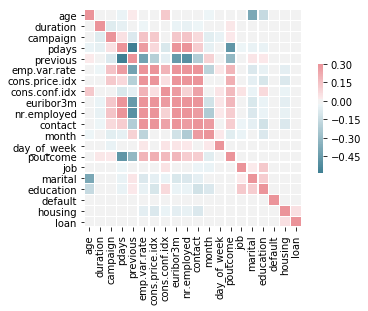

In [98]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(X.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Splitting testing and training data

In [43]:
from sklearn.cross_validation import train_test_split

c:\users\nikola\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(Xdum, y, test_size=0.3, random_state=89)

# K-Nearest Neighbors

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn = KNeighborsClassifier(n_neighbors=100)

In [102]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [103]:
pred = knn.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [104]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

         no       0.94      0.96      0.95     10967
        yes       0.63      0.48      0.55      1390

avg / total       0.90      0.91      0.90     12357



In [105]:
print(confusion_matrix(y_test, pred))

[[10578   389]
 [  722   668]]


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dtree = DecisionTreeClassifier(max_depth=5)

In [107]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
dtpred = dtree.predict(X_test)

In [109]:
print(classification_report(y_test, dtpred))

             precision    recall  f1-score   support

         no       0.94      0.96      0.95     10967
        yes       0.62      0.52      0.57      1390

avg / total       0.90      0.91      0.91     12357



In [110]:
print(confusion_matrix(y_test, dtpred))

[[10528   439]
 [  669   721]]


## Drawing the decision tree

In [86]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X.columns[:])
features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan']

In [87]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

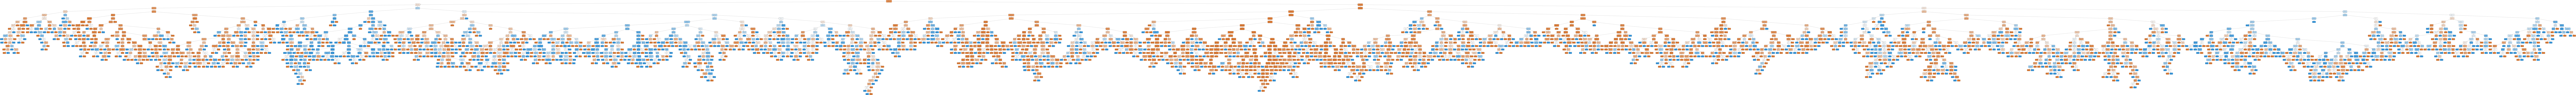

In [88]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc = RandomForestClassifier(n_estimators=200)

In [115]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
rfcpred = rfc.predict(X_test)

In [117]:
print(classification_report(y_test, rfcpred))

             precision    recall  f1-score   support

         no       0.94      0.97      0.95     10967
        yes       0.66      0.48      0.55      1390

avg / total       0.90      0.91      0.91     12357



In [118]:
print(confusion_matrix(y_test, rfcpred))

[[10621   346]
 [  727   663]]


# Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

In [119]:
gnb = GaussianNB()

In [120]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [121]:
gnb_pred = gnb.predict(X_test)

In [122]:
print(classification_report(y_test, gnb_pred))

             precision    recall  f1-score   support

         no       0.94      0.91      0.92     10967
        yes       0.42      0.52      0.47      1390

avg / total       0.88      0.87      0.87     12357



In [123]:
print(confusion_matrix(y_test, gnb_pred))

[[9975  992]
 [ 666  724]]
